In [13]:
from bubbleDetection.model import BubLeNet
import torch
from bubbleDetection.dataset import *
from torch.utils.data import DataLoader
import torchvision.transforms as T

In [4]:
num_classes = 4 
net = BubLeNet(num_classes=num_classes)
model_state_dict = torch.load('bubble_weight.pth')
net.load_state_dict(model_state_dict)
net.eval()

BubLeNet(
  (cnn_net): Sequential(
    (0): Conv2d(3, 6, kernel_size=(18, 18), stride=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_net): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=4, bias=True)
  )
)

In [14]:
trainset = BubbleDataset(train=True) 
trainloader = DataLoader(trainset, batch_size=5, shuffle=True)
transform = T.ToPILImage() 

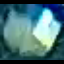

tensor(1)


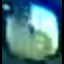

tensor(1)


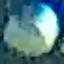

tensor(1)


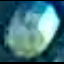

tensor(1)


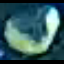

tensor(1)


In [45]:
input, label = next(iter(trainloader)) 
output = net(input) 
for i in range(len(label)): 
    img = transform(input[i])
    _, res = torch.max(output[i].data, dim=0)
    display(img) 
    print(res)
    